In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate, optimize
pd.set_option('display.max_rows', 200)

In [1]:
def postgres_conn(schema):
    import psycopg2
    
    list_cori_schema = ['coririsi_layer', 'coririsi_source', 'coririsi_public', 'coririsi_geo', 'coririsi_analysis', 'coririsi_temp']
    
    if schema in list_cori_schema:
        if schema == 'coririsi_layer':
            conn_opition = '-c search_path=sch_layer'
        elif schema == 'coririsi_source':
              conn_opition = '-c search_path=sch_source'
        elif schema == 'coririsi_public':
              conn_opition = '-c search_path=public'
        elif schema == 'coririsi_analysis':
              conn_opition = '-c search_path=sch_analysis'
        elif schema == 'coririsi_temp':
              conn_opition = '-c search_path=sch_temp'
        elif schema == 'coririsi_geo':
              conn_opition = '-c search_path=sch_census_tiger'
    else:
        raise KeyError("Unrecognized postgres schema. Please choose from " + str(list_cori_schema).strip('[]'))
        

    try:
        conn = psycopg2.connect(dbname='data',
                                user='risi_fanniemae',
                                host='cori-risi.c6zaibvi9wyg.us-east-1.rds.amazonaws.com', 
                                password='85h!M1az%6sR#s2Z2$5DueCJ4PuJbI',
                                options =  conn_opition)
    except:
        print("I am unable to connect to the database")

    return conn


In [59]:
conn = postgres_conn("coririsi_layer")

covid_select_Query = "select * from covid_19_county_long"
x_covid_time = pd.read_sql_query(covid_select_Query, conn)

attr_select_Query = "select geoid, total_population_2018 from attr_county_full"
x_pop = pd.read_sql_query(attr_select_Query, conn)


In [61]:
x_covid_time_pop = x_covid_time.merge(x_pop,
                                left_on='geoid', 
                                right_on='geoid', 
                                how='left')

In [138]:
x_covid_time_pop_test = x_covid_time_pop.loc[x_covid_time_pop['namelsad'] == 'New York County']
x_covid_time_pop_test = x_covid_time_pop_test.drop_duplicates(subset = 'Last_Update')
x_covid_time_pop_test['day_count'] = list(range(22,len(x_covid_time_pop_test)+22))

x_covid_time_pop_test

,namelsad,st_stusps,us_region,us_subregion,wikipedia,geoid,geoid_st,countyfp,countyns,affgeoid,...,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,latest_update,geometry,total_population_2018,day_count
11072,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,9654,63,0,0,"New York City, New York, US",2020-03-22,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,22
11073,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,12305,99,0,0,"New York City, New York, US",2020-03-23,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,23
11074,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,14904,131,0,0,"New York City, New York, US",2020-03-24,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,24
11075,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,17856,199,0,0,"New York City, New York, US",2020-03-25,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,25
11076,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,21873,281,0,0,"New York City, New York, US",2020-03-26,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,26
11077,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,25573,366,0,0,"New York City, New York, US",2020-03-27,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,27
11078,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,29776,517,0,0,"New York City, New York, US",2020-03-28,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,28
11079,New York County,NY,Mid-Atlantic North,none,"https://en.wikipedia.org/wiki/New York_County,...",36061,36,061,00974129,0500000US36061,...,-73.971526,33768,678,0,0,"New York City, New York, US",2020-03-29,0101000020AD100000A4F08B63EB7D52C0F56E5F479B63...,1630000.0,29


In [139]:
s_data = [x_covid_time_pop_test.iloc[0]["total_population_2018"] - i for i in x_covid_time_pop_test.Confirmed.values]
i_data = [i for i in x_covid_time_pop_test.Confirmed.values - x_covid_time_pop_test.Deaths.values - x_covid_time_pop_test.Recovered.values]
r_data = [i for i in x_covid_time_pop_test.Deaths.values + x_covid_time_pop_test.Recovered.values]



In [133]:
r_data

[63, 99, 131, 199, 281, 366, 517, 678]

In [125]:
ydata = [i for i in x_covid_time_pop_test.Confirmed.values - x_covid_time_pop_test.Deaths.values - x_covid_time_pop_test.Recovered.values]
xdata = x_covid_time_pop_test.day_count
ydata = np.array(ydata, dtype=float)
xdata = np.array(xdata, dtype=float)


In [140]:
N = x_covid_time_pop_test.iloc[0]["total_population_2018"]
inf0 = i_data[0]
sus0 = s_data[0]
rec0 = r_data[0]

popt, pcov = optimize.curve_fit(fit_odeint, xdata, ydata)
fitted = fit_odeint(xdata, *popt)
fitted_more = fit_odeint(list(range(100)), *popt)


In [143]:
pcov

array([[0.0008651 , 0.00091865],
       [0.00091865, 0.00097581]])

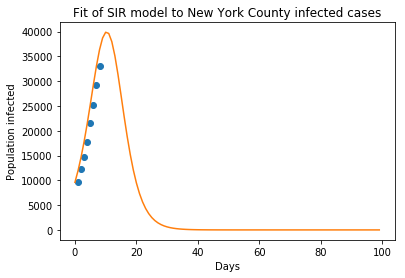

Optimal parameters: beta = -1.1128548376155503  and gamma =  -1.3272143895641075


In [141]:
plt.plot(xdata, ydata, 'o')
plt.plot(list(range(100)), fitted_more)
plt.title("Fit of SIR model to "+ x_covid_time_pop_test.iloc[0]["namelsad"] + " infected cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


In [119]:
popt

array([-1.09573561, -1.31127817])

/home/chen.chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/chen.chen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in double_scalars
  


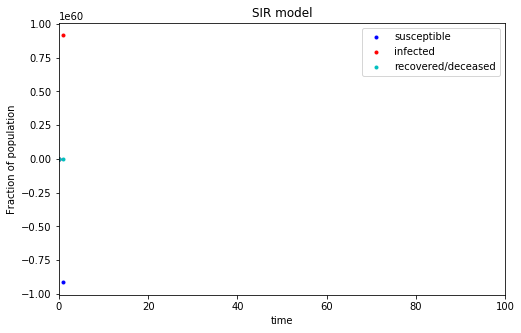

In [118]:
sus, inf, rec = SIR(N, b0 = 9654, beta = -1.0957356066048822, gamma = -1.3112781718842563, hs = 1)

f = plt.figure(figsize=(8,5)) 
plt.plot(sus, 'b.', label='susceptible');
plt.plot(inf, 'r.', label='infected');
plt.plot(rec, 'c.', label='recovered/deceased');
plt.title("SIR model")
plt.xlabel("time", fontsize=10);
plt.ylabel("Fraction of population", fontsize=10);
plt.legend(loc='best')
plt.xlim(0,100)
plt.savefig('SIR_example.png')
plt.show()


In [123]:
eons=1000
N = 1000
Susceptible=950
Infected=50
Resistant=0
rateSI=0.05
rateIR=0.01


Susceptible = [Susceptible]
Infected = [Infected]
Resistant = [Resistant]

for step in range(1, eons):
    S_to_I = (rateSI * Susceptible[-1] * Infected[-1]) / N
    I_to_R = Infected[-1] * rateIR
    Susceptible.append(Susceptible[-1] - S_to_I)
    Infected.append(Infected[-1] + S_to_I - I_to_R)
    Resistant.append(Resistant[-1] + I_to_R)

results = pd.DataFrame.from_dict({'Time':list(range(len(Susceptible))),
    'Susceptible':Susceptible, 'Infected':Infected, 'Resistant':Resistant},
    orient='index').transpose()
modelRun = True


In [124]:
results

,Time,Susceptible,Infected,Resistant
0,0.0,950.000000,50.000000,0.000000
1,1.0,947.625000,51.875000,0.500000
2,2.0,945.167098,53.814152,1.018750
3,3.0,942.623929,55.819179,1.556892
4,4.0,939.993105,57.891812,2.115083
5,5.0,937.272209,60.033789,2.694001
6,6.0,934.458809,62.246851,3.294339
7,7.0,931.550453,64.532739,3.916808
8,8.0,928.544678,66.893186,4.562135
9,9.0,925.439013,69.329920,5.231067


In [6]:
# Susceptible equation
def fa(N, a, b, beta):
    fa = -beta*a*b
    return fa

# Infected equation
def fb(N, a, b, beta, gamma):
    fb = beta*a*b - gamma*b
    return fb

# Recovered/deceased equation
def fc(N, b, gamma):
    fc = gamma*b
    return fc

# Runge-Kutta method of 4rth order for 3 dimensions (susceptible a, infected b and recovered r)
def rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs):
    a1 = fa(N, a, b, beta)*hs
    b1 = fb(N, a, b, beta, gamma)*hs
    c1 = fc(N, b, gamma)*hs
    ak = a + a1*0.5
    bk = b + b1*0.5
    ck = c + c1*0.5
    a2 = fa(N, ak, bk, beta)*hs
    b2 = fb(N, ak, bk, beta, gamma)*hs
    c2 = fc(N, bk, gamma)*hs
    ak = a + a2*0.5
    bk = b + b2*0.5
    ck = c + c2*0.5
    a3 = fa(N, ak, bk, beta)*hs
    b3 = fb(N, ak, bk, beta, gamma)*hs
    c3 = fc(N, bk, gamma)*hs
    ak = a + a3
    bk = b + b3
    ck = c + c3
    a4 = fa(N, ak, bk, beta)*hs
    b4 = fb(N, ak, bk, beta, gamma)*hs
    c4 = fc(N, bk, gamma)*hs
    a = a + (a1 + 2*(a2 + a3) + a4)/6
    b = b + (b1 + 2*(b2 + b3) + b4)/6
    c = c + (c1 + 2*(c2 + c3) + c4)/6
    return a, b, c

def sir_model(y, x, beta, gamma):
    dsdt = -beta * y[0] * y[1] / N
    drdt = gamma * y[1]
    didt = beta * y[0] * y[1] / N - gamma * y[1]
    return dsdt, didt, drdt

def fit_odeint(x, beta, gamma):
    return integrate.odeint(sir_model, (sus0, inf0, rec0), x, args=(beta, gamma))[:,1]



In [7]:
def SIR(N, b0, beta, gamma, hs):
    
    """
    N = total number of population
    beta = transition rate S->I
    gamma = transition rate I->R
    k =  denotes the constant degree distribution of the network (average value for networks in which 
    the probability of finding a node with a different connectivity decays exponentially fast
    hs = jump step of the numerical integration
    """
    
    # Initial condition
    a = float(N-1)/N -b0
    b = float(1)/N +b0
    c = 0.

    sus, inf, rec= [],[],[]
    for i in range(10000): # Run for a certain number of time-steps
        sus.append(a)
        inf.append(b)
        rec.append(c)
        a,b,c = rK4(N, a, b, c, fa, fb, fc, beta, gamma, hs)

    return sus, inf, rec


In [ ]:
x_covid_time['day_count'] = list(range(1,len(country_df)+1))
